In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import keras
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, Activation,MaxPool2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
labels = ['no-plastic','plastic']

In [4]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/Liveinlab','train',i)
    for j in (os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/Liveinlab','test',i)
    for j in (os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [6]:
X_train.shape

(2150, 224, 224, 3)

In [7]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(X_train)
X_train.shape

(2150, 224, 224, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=6,kernel_size=(5,5),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(5,5),padding="same", activation="relu"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation="softmax"))

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

In [12]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])
r=model.fit(X_train,y_train,validation_split=0.1, epochs = 50,steps_per_epoch=12, verbose=1, batch_size=30)

Epoch 1/50
12/12 [==============================] - 25s 2s/step - loss: 108.0108 - accuracy: 0.5417 - val_loss: 2.7436 - val_accuracy: 0.6340
Epoch 2/50
12/12 [==============================] - 25s 2s/step - loss: 1.7440 - accuracy: 0.6667 - val_loss: 0.6262 - val_accuracy: 0.6082
Epoch 3/50
12/12 [==============================] - 24s 2s/step - loss: 0.6685 - accuracy: 0.5528 - val_loss: 0.6048 - val_accuracy: 0.6134
Epoch 4/50
12/12 [==============================] - 22s 2s/step - loss: 0.6413 - accuracy: 0.5694 - val_loss: 0.5975 - val_accuracy: 0.6031
Epoch 5/50
12/12 [==============================] - 22s 2s/step - loss: 0.5823 - accuracy: 0.6798 - val_loss: 0.6262 - val_accuracy: 0.6753
Epoch 6/50
12/12 [==============================] - 23s 2s/step - loss: 0.6564 - accuracy: 0.6500 - val_loss: 0.5673 - val_accuracy: 0.7010
Epoch 7/50
12/12 [==============================] - 23s 2s/step - loss: 0.5686 - accuracy: 0.6694 - val_loss: 0.5356 - val_accuracy: 0.7680
Epoch 8/50
12/12 [

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 [==============================] - 4s 552ms/step - loss: 0.4781 - accuracy: 0.8791
Test Loss: 0.47806811332702637
Test Accuracy: 0.8790697455406189


In [14]:
model.save('s2c_model.h5' )

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
train_dir = "/content/drive/MyDrive/Liveinlab/train"
test_dir = "/content/drive/MyDrive/Liveinlab/test"

In [16]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode = "categorical",
                                                                 batch_size = 32
                                                                 )
test_data =tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size =(224,224),
                                                               label_mode = "categorical",
                                                               batch_size = 32
                                                               )

Found 1720 files belonging to 2 classes.
Found 430 files belonging to 2 classes.


In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

7/7 [==============================] - 5s 700ms/step


In [ ]:
print(classification_report(y_test_new,pred))

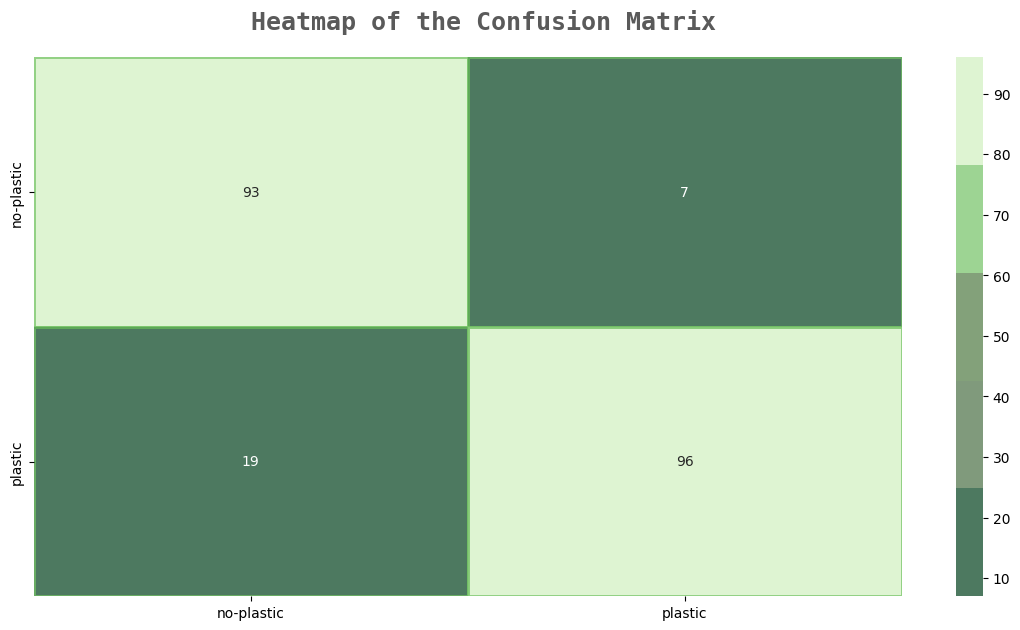

In [19]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']



fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::1],alpha=0.7,linewidths=2,linecolor=colors_green[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Load the model
model = load_model('/content/s2c_model.h5')

# Preprocess the image
def preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)  # Resize to the input size expected by the model
    image_array = np.array(image)

    # Normalize if the model was trained on normalized images
    image_array = image_array / 255.0

    # Expand dimensions to match model input shape (batch size dimension)
    image_array = np.expand_dims(image_array, axis=0)

    return image_array

# Example usage
image_path = '/content/Example.jpeg'  # Replace with your image path
target_size = (224, 224)  # Replace with your model's input size
image_array = preprocess_image(image_path, target_size)

# Make predictions
predictions = model.predict(image_array)

# Get the class with the highest probability
predicted_class_index = np.argmax(predictions, axis=1)

# Map the predicted class index to class names
class_names = ['no plastic', 'plastic']
predicted_class = class_names[predicted_class_index[0]]

print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 100ms/step
Predicted class: plastic
